# <center> Tutorial API Spotify </center>


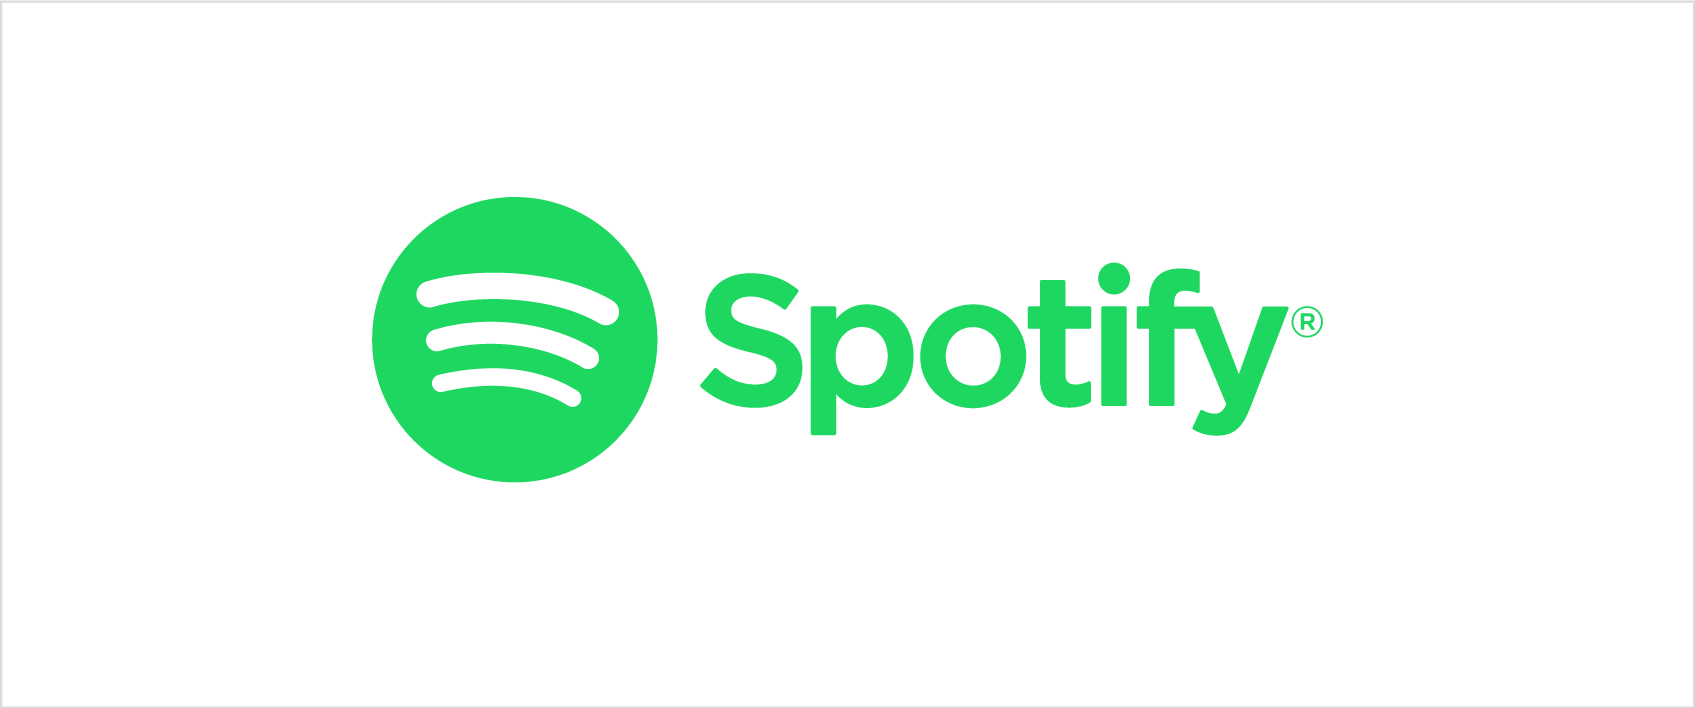

### Realizzato da Marco Ardizzone
### X81001077


## Why would it be worth it to analyze Spotify? It is a simple music streaming service...
Spotify is the world's biggest music streaming service. It has more than 50 millions tracks and by the first quarter of 2020 it had 286 millions active users, of which 130 millions were Premium Users.
> source: https://www.businessofapps.com/data/spotify-statistics/ 

Analyzing ***well*** Spotify's data would let an artist know which features are present in successful songs, allowing him to produce a track which may accomplish most users' musical taste

## How to connect to the official API?

In order to access and connect to the official API it is mandatory to create a Spotify's Developer account.
You can create one by:

    - Logging with your Spotify's account, or creating one whether you don't have one
    - Accept Terms of Service


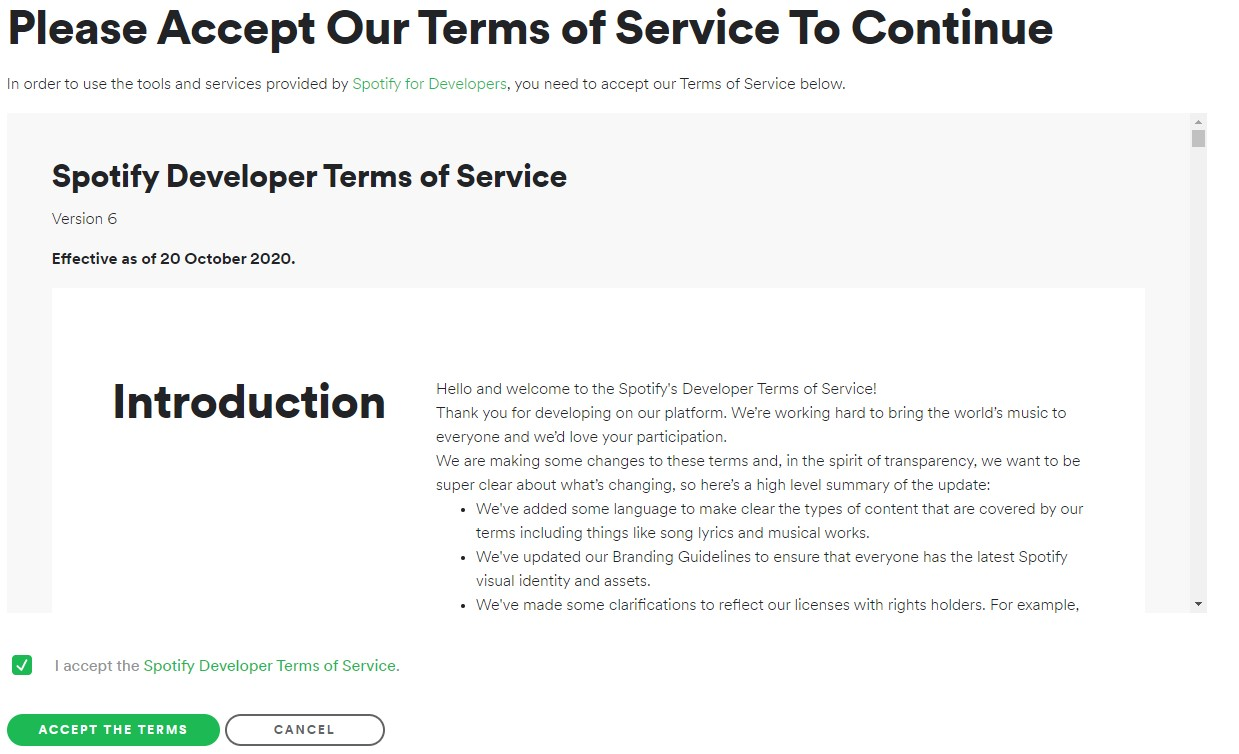

#### Once you *read* and accept Spotify's Terms Of Service you'll be redirected to your Dashboard, where you'll be able to create your App.



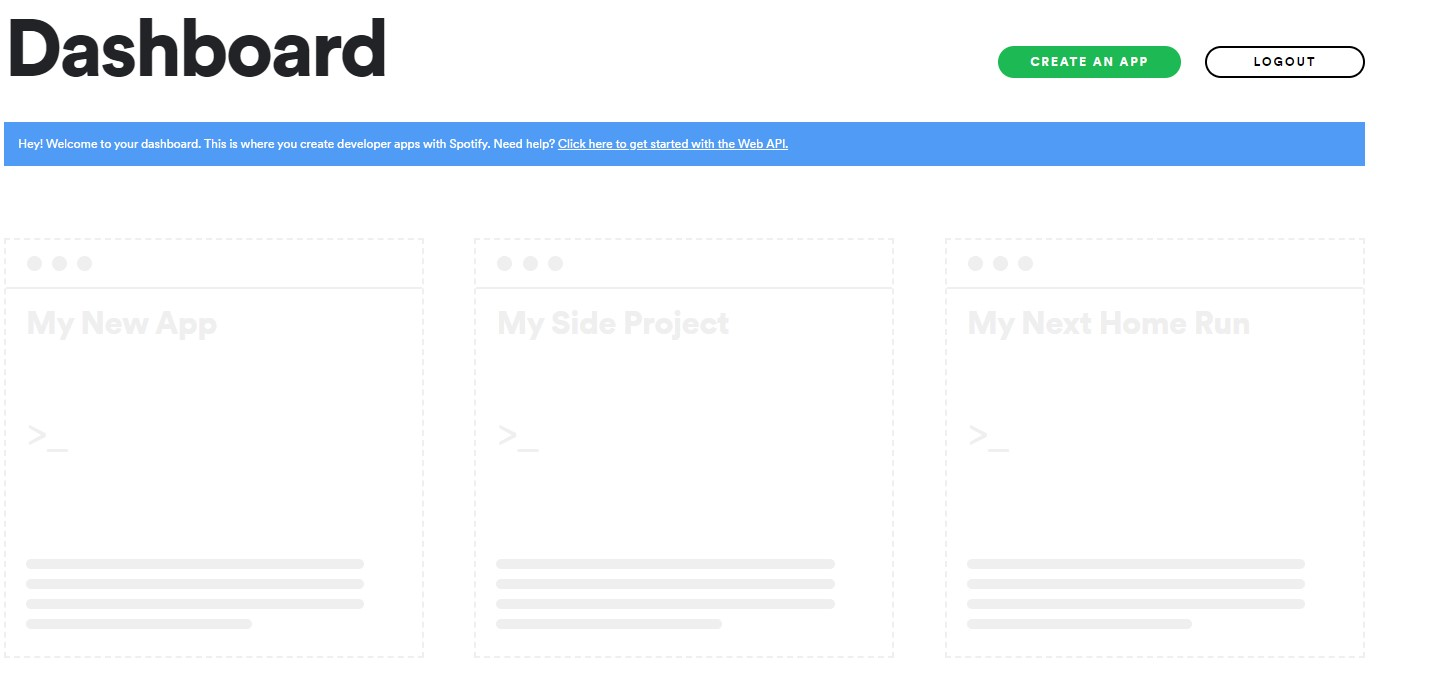

#### You must choose a name, add a short description of what your App will do using Spotify's API and then accept the Developer Terms of Service


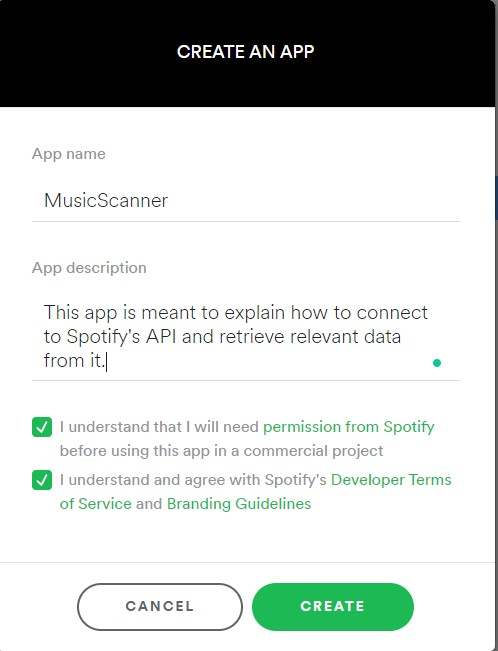

<p>You will now find your App in your personal Dashboard.</p>

It will show the App's name, description, **Client ID** and **Client Secret** , which we will later use for connecting to Spotify.

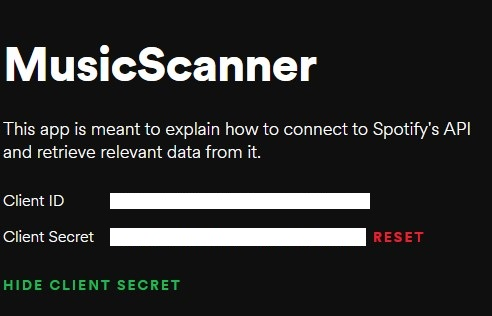

We can now write some code for connecting to the API.


First of all, you must install the request module by **pip install requests**, which allows you to send HTTP request and receive data in JSON format.

In [1]:
import requests
import datetime
from urllib.parse import urlencode
import base64

In [2]:
#insert your id and secret for connection to API
client_id = '39a9b81916fa4fd8b19775b13a8d0788'
client_secret = '1e3f3dec8c63431baf90d47df9f01f00'

In [3]:
#create a class for connection to API
class SpotifyAPI(object):
    access_token = None
    access_token_expires = datetime.datetime.now() #if there is a token, it must expire now.
    access_token_did_expire = True                 #it is expired by default
    client_id = None
    client_secret = None
    token_url = "https://accounts.spotify.com/api/token"
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret

    def get_client_credentials(self):
        """
        return a string codified in Base64
        """
        client_id = self.client_id
        client_secret = self.client_secret
        if client_secret == None or client_id == None:
            raise Exception("You must insert a valid id and secret")
        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
    
    def get_token_headers(self):
        client_creds_b64 = self.get_client_credentials()
        return {
            "Authorization": f"Basic {client_creds_b64}"
        }
    
    def get_token_data(self):
        return {
            "grant_type": "client_credentials"
        } 
    
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data=token_data, headers=token_headers) #making a POST request
        if r.status_code not in range(200, 299): #if the status code in between 200 and 299 it was a successful request
            raise Exception("Autenticazione fallita")
        data = r.json() #getting data from POST request in JSON format
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds
        expires = now + datetime.timedelta(seconds=expires_in) #when will the token expire?
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expire = expires < now #check where the token is expired or not
        return True
    
    def get_access_token(self):
        token = self.access_token
        expires = self.access_token_expires
        now = datetime.datetime.now()
        if expires < now:
            self.perform_auth()
            return self.get_access_token()
        elif token == None:
            self.perform_auth()
            return self.get_access_token() 
        return token
    
    def get_resource_header(self):
        access_token = self.get_access_token()
        headers = {
            "Authorization": f"Bearer {access_token}"
        }
        return headers
        
        
    def get_resource(self, lookup_id, resource_type='albums', version='v1'):
        endpoint = f"https://api.spotify.com/{version}/{resource_type}/{lookup_id}"
        headers = self.get_resource_header()
        r = requests.get(endpoint, headers=headers)
        if r.status_code not in range(200, 299):
            return {}
        return r.json()
    
    def get_album(self, _id):
        return self.get_resource(_id, resource_type='albums')
    
    def get_artist(self, _id):
        return self.get_resource(_id, resource_type='artists')
    
    def search(self, query, search_type='artist'): #by default, we'll search for an artist
        headers = self.get_resource_header()
        endpoint = "https://api.spotify.com/v1/search"
        data = urlencode({"q":query, "type":search_type.lower()}) #it must be in lower case, otherwise will give an error
        lookup_url = f"{endpoint}?{data}" #formatting the url
        r = requests.get(lookup_url, headers=headers)
        if r.status_code not in range(200, 299):  #if the status code in between 200 and 299 it was a successful request
            return {}
        return r.json()

#### We can now instance an object of type SpotifyAPI and use it.

In [4]:
spotify = SpotifyAPI(client_id, client_secret)
spotify.search(query="Post Malone", search_type='artist')

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Post+Malone&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/246dkjvS1zLTtiykXe5h60'},
    'followers': {'href': None, 'total': 29347447},
    'genres': ['dfw rap', 'melodic rap', 'rap'],
    'href': 'https://api.spotify.com/v1/artists/246dkjvS1zLTtiykXe5h60',
    'id': '246dkjvS1zLTtiykXe5h60',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/93fec27f9aac86526b9010e882037afbda4e3d5f',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/9040899d5660920fdf7efeb7aa2cc4e6d86f86f6',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/d15a5ffb3d22adabd09a749e09e846f527ab5a94',
      'width': 160}],
    'name': 'Post Malone',
    'popularity': 95,
    'type': 'artist',
    'uri': 'spotify:artist:246dkjvS1zLTtiykXe5h60'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/5TeUvkYeLhra8

> An example of query where we are searching about Post Malone
We got a lot of informations, such as:
    <ul>
    <li>ID </li>
    <li> Popularity index </li>
    <li> Followers </li>
    <li> Genres </li>
    </ul>

This code will allow you to connect to Spotify, make queries and analyze data, but, as you can see, this code is not so easy to understand and it may be difficult to make high-level analysis.
There are some third-part libraries which allows us to connect to Spotify in a much more easier way.

## Spotipy: A lighweight Python library for the Spotify Web API


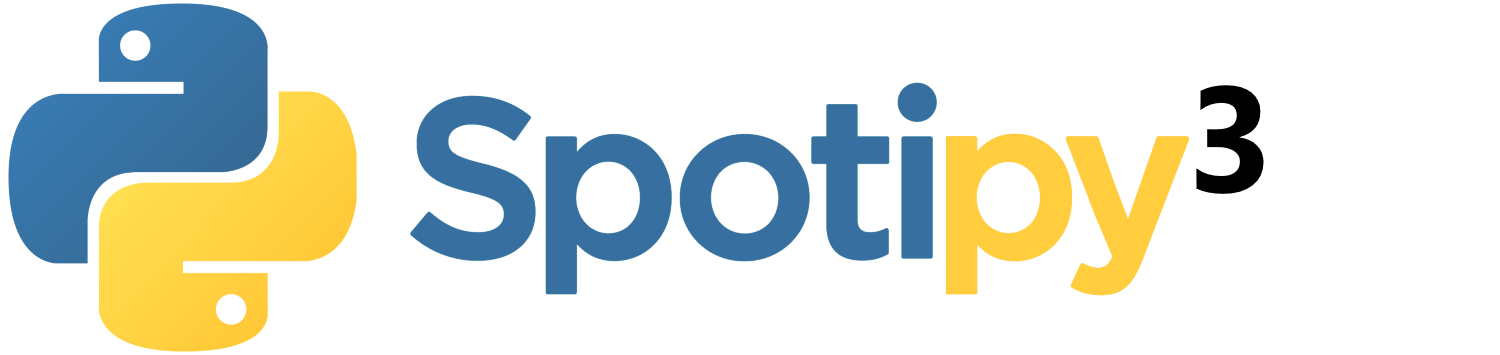

Spotipy is a third-part library which has methods that make it very easy to connect to Spotify get data from it. \
[Here](https://github.com/plamere/spotipy) you can find the official GitHub page

Before using Spotipy, you must install it by using **pip install spotipy**.



In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

#insert id and secret
client_id = '39a9b81916fa4fd8b19775b13a8d0788'
client_secret = '1e3f3dec8c63431baf90d47df9f01f00'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

As you can see, Spotipy allows us to connect to the API using 2 lines of code, while we needed several mode lines of code for connecting without using any third-part library.

In [6]:
#a method that get tracks from a given playlist
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids


We now test this method using "Global 50" Spotify's playlist.
In order to get user and playlist_id, you need to right-click on the playlist > share > copy link to the playlist.

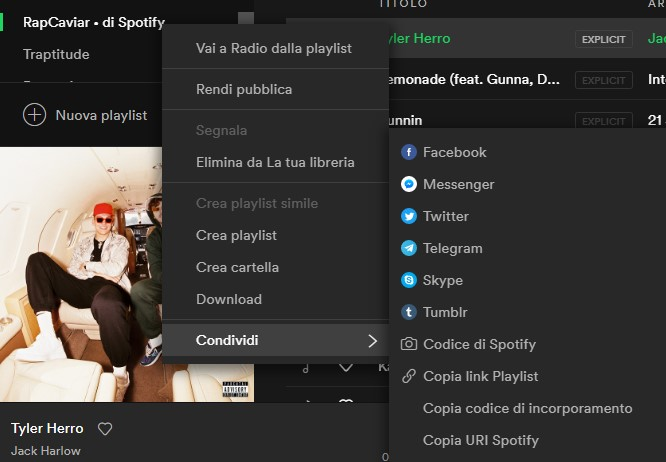

You will get a link similar to this: https//open.spotifydotcom/playlist/**37i9dQZF1DX0XUsuxWHRQd**?si=**lNtOMLmxQWKNgw0J5zTQlA**


The first code is playlist_id, while the second is the ID of the user whos created the playlist.

In [7]:
ids = getTrackIDs('7r0cXaVKRQ6IGSqj_NYJ5Q', '37i9dQZEVXbMDoHDwVN2tF')

In [8]:
#a method that gets features for every track in a playlist, such as name, artist, popularity ect
def getTrackFeatures(id):
    meta = sp.track(id) #track's metadata
    features = sp.audio_features(id) #features of the given song
    
    
    #metadata
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    artist_id = meta['album']['artists'][0]['id']
    release_date = meta['album']['release_date']
    lenght = meta['duration_ms']
    popularity = meta['popularity']
    genres = genreArtist(meta['album']['artists'][0]['name'])[0]
    
    #features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    
    #return every metadata and features of the track
    track = [name, album, artist, artist_id, release_date, lenght, popularity, genres, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness]
    return track

#method that return genres of an artist
def genreArtist(name):
    risultato = sp.search(q=name, type='artist')['artists']['items'][0]['genres']
    type(risultato)
    return risultato
    

In [9]:
#method that gets features of every song in a playlist, put it in a Pandas DataFrame and also download it as a .csv file
tracks = []
for i in range(len(ids)):
    time.sleep(.5)
    track = getTrackFeatures(ids[i])
    tracks.append(track)
    
    #create a DataFrame using our data and exporting it in .csv
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'artist_id', 'release_date', 'lenght', 'popularity', 'genres', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness'])
    #df.to_csv("spotify.csv", sep= ',')

In [10]:
df.sort_values(by='popularity', ascending=False).head()

,Unnamed: 0,name,album,artist,artist_id,release_date,lenght,popularity,genres,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness
3,3,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,6fWVd57NKTalqvmjRd2t8Z,2020-07-24,140525,100,cali rap,0.700,0.22100,0.722,0.000000,0.2720,-3.558,0.0369
0,0,Dakiti,Dakiti,Bad Bunny,4q3ewBCX7sLwd24euuV69X,2020-10-30,205090,99,latin,0.731,0.40100,0.573,0.000052,0.1130,-10.059,0.0544
6,6,Dynamite,Dynamite (DayTime Version),BTS,3Nrfpe0tUJi4K4DXYWgMUX,2020-08-28,199053,97,k-pop,0.746,0.01120,0.765,0.000000,0.0936,-4.410,0.0993
8,8,Blinding Lights,After Hours,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,2020-03-20,200040,96,canadian contemporary r&b,0.514,0.00146,0.730,0.000095,0.0897,-5.934,0.0598
9,9,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),Cardi B,4kYSro6naA4h99UJvo89HB,2020-08-07,187541,96,pop,0.935,0.01940,0.454,0.000000,0.0824,-7.509,0.3750


> Here we can see the 5 most popular song by rating. 

## What can we do using these data?
<p>We can now analyze the data. </p>
<p>For instance, we may check what are common features of the most popular tracks, in order to suggest to an artist how a successfull song is usually made, so he can write songs that will accomplish most user's tastes. </p>

In [11]:
df.describe().drop('count', axis=0)

,Unnamed: 0,lenght,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness
mean,24.50000,194107.980000,91.120000,0.694780,0.246152,0.643420,0.002887,0.146242,-5.851300,0.114658
std,14.57738,26633.011711,5.359104,0.152273,0.228155,0.146775,0.018366,0.081944,2.059623,0.096656
min,0.00000,140525.000000,70.000000,0.333000,0.001150,0.239000,0.000000,0.041000,-10.778000,0.031900
25%,12.25000,174080.250000,90.000000,0.633750,0.088825,0.554250,0.000000,0.089725,-7.422500,0.054325
50%,24.50000,190391.000000,92.000000,0.736500,0.190500,0.671500,0.000000,0.110500,-5.461500,0.068050
75%,36.75000,210285.750000,94.000000,0.798250,0.299750,0.736750,0.000032,0.188000,-4.218750,0.155750
max,49.00000,261492.000000,100.000000,0.935000,0.864000,0.891000,0.130000,0.349000,-3.090000,0.389000


Analyzing Global 50 Playlist's stats, we can notice that the mean lenght of a track is 194s and 75% of the track are not longer than 210s, which tells us that users may not like too long or too short songs.
We also notice that 50% of songs have a great index of danceability, so we may be interested in realising a danceability track.

Let's now analyze song's genres.

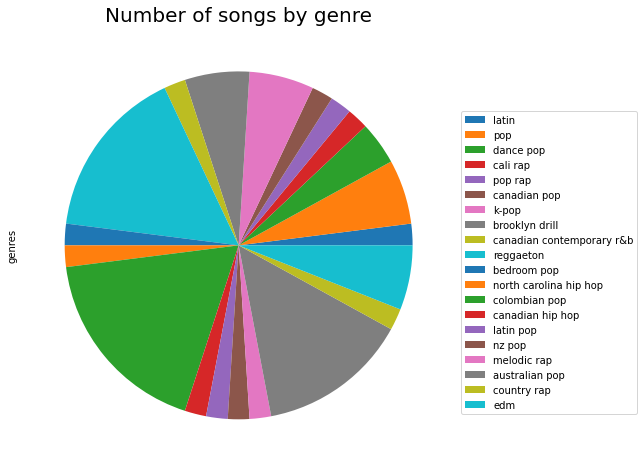

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
my_labels = df['genres'].unique()
df.groupby('genres')['genres'].count().plot.pie(labels=None)
plt.legend(loc="lower left", labels=my_labels, bbox_to_anchor=(1.0,0.1))
plt.title("Number of songs by genre", fontsize=20)
plt.show()

We notice that most of genres are sub-genres, "australian pop" and "canadian pop" are 2 slightly different kind of pop music.
We want a cleaner graph so we can put together genres that come from the same original genre.

In [13]:
df["genres"].replace({"australian pop": "pop", "bedroom pop": "pop", "brooklyn drill" : "drill"}, inplace=True)
df["genres"].replace({"cali rap": "rap", "canadian contemporary r&b": "r&b", "canadian hip hop" : "hip hop"}, inplace=True)
df["genres"].replace({"canadian pop": "pop", "colombian pop": "pop", "country rap" : "rap", "dance pop" : "pop"}, inplace=True)
df["genres"].replace({"melodic rap": "rap", "north carolina hip hop": "hip hop", "nz pop" : "pop"}, inplace=True)
df["genres"].replace({"latin pop": "pop", "pop rap": "rap"}, inplace=True)

We now have a more equal genre distribution 

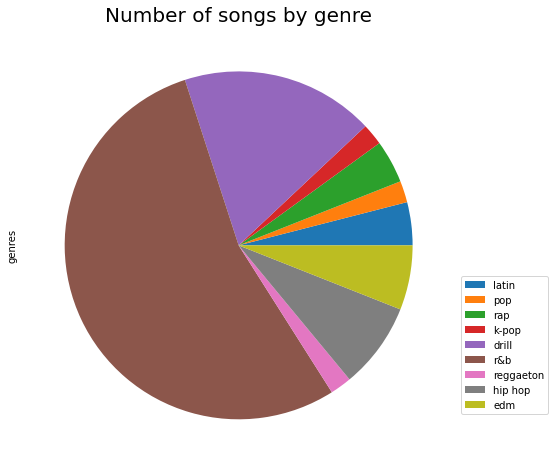

In [14]:
plt.figure(figsize=(8,8))
my_labels = df['genres'].unique()
df.groupby('genres')['genres'].count().plot.pie(labels=None)
plt.legend(loc="lower left", labels=my_labels, bbox_to_anchor=(1.0,0.1))
plt.title("Number of songs by genre", fontsize=20)
plt.show()

We clearly see that the most populars genres are **pop**, **latin**, **rap** e **reggaeton**

Let's now analyze how the popularity is distribuited by genres  

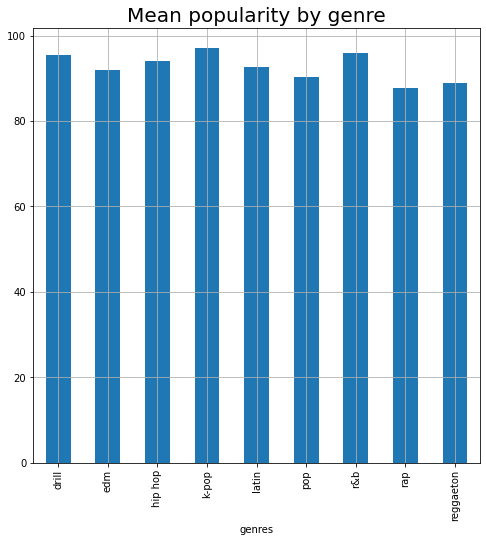

In [15]:
plt.figure(figsize=(8,8))
df.groupby('genres')['popularity'].mean().plot.bar()
plt.grid()
plt.title("Mean popularity by genre", fontsize=20)
plt.show()

We notice that genres that are less frequent have higher rating, which may look weird but it's what we expected: we've analyzed Global 50 Spotify's playlist, which contains the 50 most popular songs in Spotify, so if there are less **drill* or **k-pop** songs, the ones that are in the playlist are the most popular in their genres.
Instead, genres like **latin**, **rap** and **reggaeton** have lower rating because there are much more songs and popularity's mean decrease a bit.


### What did we learn today?
This is a simple analysis, but we learned that getting informations about Spotify's playlist is very easy using Python. 
These kind of analysis could be done to examinate the World's music industry, in order to help artists to create songs that will fulfil most users' musical tastes and be successful.